In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
datapath = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
df = pd.read_csv(datapath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [5]:
df.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             84
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

In [6]:
df['age'].unique()

array([47, 33, 41, 24, 40, 29, 28, 43, 31, 30, 49, 34, 26, 38, 27, 35, 23,
       36, 32, 45, 25, 19, 21, 20, 22, 46, 39, 37, 53, 59, 18, 52, 44, 42,
       48, 51, 50, 56, 58, 55, 54, 60, 57, 67, 65, 62, 61, 66, 68, 64, 63,
       73, 72, 70, 76, 69, 77, 71, 74, 75, 81, 78, 80, 79])

In [7]:
df.drop(['name', 'state', 'country', 'bib', 'city', 'ctz'],1, inplace=True)

In [8]:
df['over60'] = np.where(df['age']>60, 1, 0)
df['gender'] = np.where(df['gender']=='M', 1, 0)

In [9]:
df.head(20)

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,over60
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,0
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,0
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,0
5,32.58,4,82.45,0,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,0
6,17.65,4,47.67,1,28,84.65,4,70.23,4,3.23,58.60,8.38,39.72,37.65,79.83,0
7,30.48,5,76.95,1,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,0
8,17.12,3,46.37,1,43,81.23,3,67.83,3,3.10,57.03,8.00,38.60,36.60,76.70,0
9,30.48,20,77.68,1,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,0


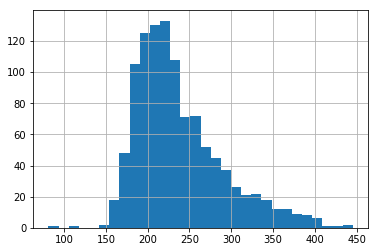

In [10]:
df[df['age']==40].official.hist(bins=30)

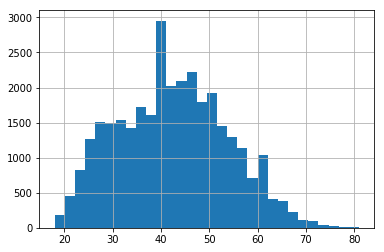

In [11]:
df.age.hist(bins=30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 16 columns):
10k          31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
40k          31984 non-null object
over60       31984 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 3.9+ MB


In [13]:
df = df.replace('-',0)

In [21]:
features = pd.DataFrame()
features['age'] = df['age']
features['overall'] = df['overall']
features['gender'] = df['gender']

In [15]:
features = features.dropna()

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# Get number of rows
rows = features.shape[0] - features.shape[0] % 4
df = features.iloc[:rows, :]

# Seperate X and y
X = features.drop('gender', 1)
y = features['gender']

# Normalize
X_norm = np.array(X)

# Halve
X_half1, X_half2 = train_test_split(
    X_norm,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)
X3, X4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

# Halve
y_half1, y_half2 = train_test_split(
    y,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
y1, y2 = train_test_split(
    y_half1,
    test_size=0.5,
    random_state=42)
y3, y4 = train_test_split(
    y_half2,
    test_size=0.5,
    random_state=42)

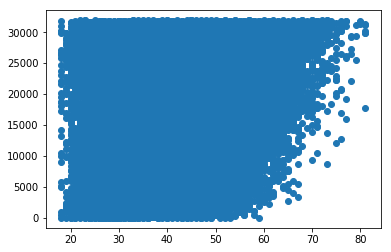

In [17]:
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.show()

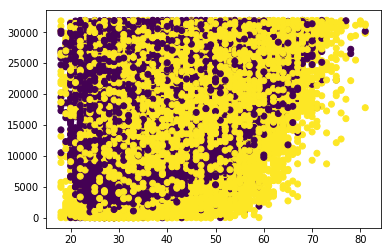

In [18]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y)
plt.show()



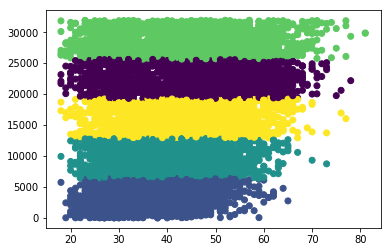

Comparing k-means clusters against the data:
gender    0     1
row_0            
0       845   747
1       231  1365
2       731   836
3       834   764
4       930   713


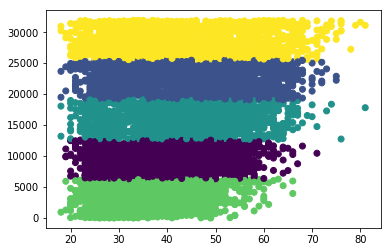

Comparing k-means clusters against the data:
gender    0     1
row_0            
0       705   872
1       876   713
2       933   676
3       226  1398
4       839   758


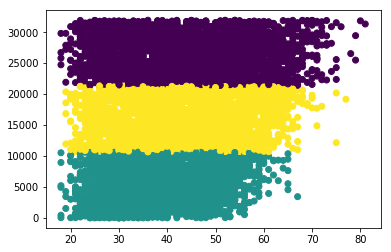

Comparing k-means clusters against the data:
gender     0     1
row_0             
0       1366  1248
1        683  1959
2       1555  1185


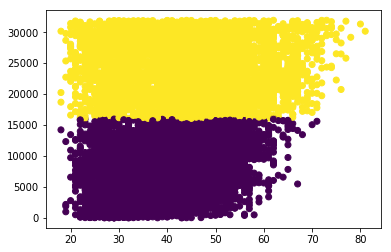

Comparing k-means clusters against the data:
gender     0     1
row_0             
0       1463  2598
1       2150  1785


In [19]:
y_pred1 = KMeans(n_clusters=5, random_state=42).fit_predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=y_pred1)
plt.show()


print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred1, y1))

y_pred2 = KMeans(n_clusters=5, random_state=42).fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pred2)
plt.show()


print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y2))

y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(X3)

plt.scatter(X3[:, 0], X3[:, 1], c=y_pred3)
plt.show()


print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y3))

y_pred4 = KMeans(n_clusters=2, random_state=42).fit_predict(X4)

plt.scatter(X4[:, 0], X4[:, 1], c=y_pred4)
plt.show()


print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred4, y4))

In [30]:
# KMeans
ypred = pd.DataFrame()

for counter, data in enumerate([(X1,X2,X3,X4)]):
    
    # Put the features into ypred.
    ypred['f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [41]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = MiniBatchKMeans(n_clusters=nclust,init='random',batch_size=600, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

K-Means


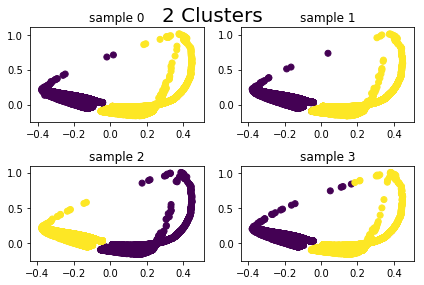

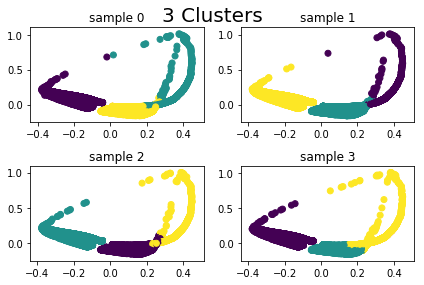

In [42]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
print('K-Means')

for cluster in range(2, 4):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [19]:
# SpectralClustering

from sklearn.cluster import SpectralClustering

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = SpectralClustering(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

K-Means


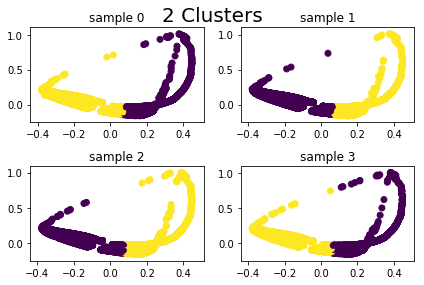

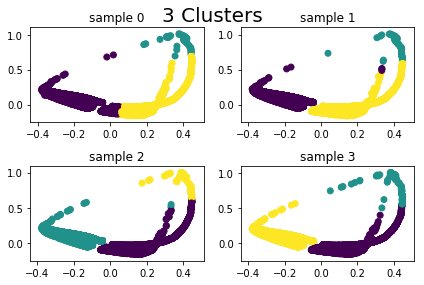

In [20]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
print('K-Means')

for cluster in range(2, 4):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')